# Module 2: Data Analysis
## Sprint 4: Capstone Project


## About this Sprint

It is time for your second Capstone Project.
You will work on this project for the whole Sprint.

We are glad you have successfully reached the final Sprint of this Module.
You will put everything you have learned in this Module to work.
The outcome of this Sprint should potentially serve as your portfolio item.

The dataset for this Sprint is the Ultimate 25k+ Matches Football Database.
It is a large dataset, which will provide your with a lot of opportunities both for statistical inference and for prediction.
Once again you will not have concrete tasks or predefined questions - you'll have to be creative and crate a plan for yourself, how to explore the data.

You already had experience doing that while completing the capstone project for the Module 1.
In the industry it's your responsibility as a data scientist to come up with plans and hypothesis for the dataset, so this is an essential skill to practice.
Good luck!

## Objectives for this Part

- Practice identifying opportunities for data analysis, raising hypothesis, and formulating research tasks.
- Practice performing EDA, statistical inference, and prediction.
- Practice working with SQL datasets.
- Practice visualizing data.

## Data

### Ultimate 25k+ Matches Football Database

<div><img width="400px" height="auto" src="https://images.unsplash.com/photo-1489944440615-453fc2b6a9a9?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1482&q=80" /></div>

Imagine that you are a data scientist working in a sports betting company.
The business executives in your company after some initial analysis (they watched this video [Understanding European Soccer in Four Simple Steps: A Guide For Americans](https://www.youtube.com/watch?v=FZ4i3KX2CW4)) identified betting on soccer (European football) as an potential new business opportunity.
The problem is that your company doesn't know a lot about soccer (European football).
Your manager asked you to analyse this dataset and see if you can provide anything that could give us a competitive advantage in the attempt to start strong in the new endevor.
She has provided your with some questions, which she suggests are a good starting point for your analysis.

- Which leagues are in which countries?
- Which leagues score the most/fewest goals?
- Who are the top scorers in each team and league?
- Is there such a thing as home advantage?
- Can we predict how many goals each team will score in each match?
- Can we predict which team will win the match?

The link to the [Kaggle dataset is here](https://www.kaggle.com/prajitdatta/ultimate-25k-matches-football-database-european).

## Requirements

- Perform data cleaning and feature engineering. Work with features - handle missing data if needed, use SQL and Pandas functions to create other additional features.
- Perform exploratory data analysis. Describe the data with basic statistical parameters - mean, median, quantiles, etc. Use parameters that give you the most important statistical insights of the data. Grouping the data and analyzing the groups - using SQL or Pandas aggregate methods. Visualize the data - you can use line, scatter, histogram plots, density plots, regplots, etc.
- Perform statistical inference. Raise and test statistical hypotheses. Set appropriate significance levels and create confidence intervals for the variables of interest.
- Train linear machine learning models and use them for forecasting. Use cross validation, information criteria, and/or other methods to specify your models correctly. Choose and use appropriate metrics to measure your models' performance.
- Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results did you get, and what these results mean.
- Present the project - the data, methods, and results.
- Provide suggestions about how your analysis can be improved.

## Bonus Challenges

As a data scientists you will spend significant amount of your time learning new things.
Sometimes you will do that for fun, but most of the time you will have an urgent problem and you will need to quickly learn some new skill to be able to solve it.
It is very important to gradually build this skill - it is extremely valuable for all data scientists.
The bonus challenges are designed to simulate these types of situations.
These challenges require you to do something that we haven't covered in the course yet.
Instead of trying to do all of the bonus challenges, concentrate on just one or two and do them well.
All of the bonus challenges are optional - no points will be deducted if you skip them.

- Try dimensionality reduction algorithm (e.g. PCA, t-SNE, Autoencoder).
- Try clustering your data.
- Try a nonlinear machine learning model to explain relationships between features and predict new values.

## Evaluation Criteria

- Adherence to the requirements. How well did you meet the requirements?
- Depth of your analysis. Did you just skim the surface or did you explored the dataset in depth?
- Visualization quality. Did you use charts effectively to visualize patterns in the data? Are your visualizations properly labeled? Did you use colors effectively? Did you adhere to the principle of proportional ink?
- Code quality. Was your code well-structure? Did you use the appropriate levels of abstraction? Did you remove commented out and unused code? Did you adhere to the PEP8?
- Code performance. Did you use the suitable algorithms and data structures to solve the problems?
- Delivery of the presentation. How clear are your reasoning and explanations?
- Bonus challenges. Have you put extra effort to do one or more of the bonus challenges (no points will be deducted if you skip them)?


In [1]:
%load_ext lab_black

In [2]:
import sqlite3 as sql
import duckdb as ddb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import re
import math
import joblib
from scipy import stats

from my_funcs import *

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    plot_confusion_matrix,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
)
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.pipeline import Pipeline as ImPipeline
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek, SMOTEENN
from IPython.display import display

import warnings

warnings.filterwarnings("ignore")

In [3]:
np.random.seed(42)
rng = np.random.RandomState(42)

# Data loading

The football dataset contains 7 data tables  
with league, team, player and match data.

In [4]:
conn = sql.connect("database.sqlite")

In [5]:
allin = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn)

In [7]:
country = pd.read_sql_query("select * from Country", conn)
league = pd.read_sql_query("select country_id, name from League", conn)
match = pd.read_sql_query("select * from Match", conn)
player_at = pd.read_sql_query("select * from Player_Attributes", conn)
player = pd.read_sql_query("select * from Player", conn)
team = pd.read_sql_query("select * from Team", conn)
team_at = pd.read_sql_query("select * from Team_Attributes", conn)

In [8]:
player_at["date"] = pd.to_datetime(player_at["date"])

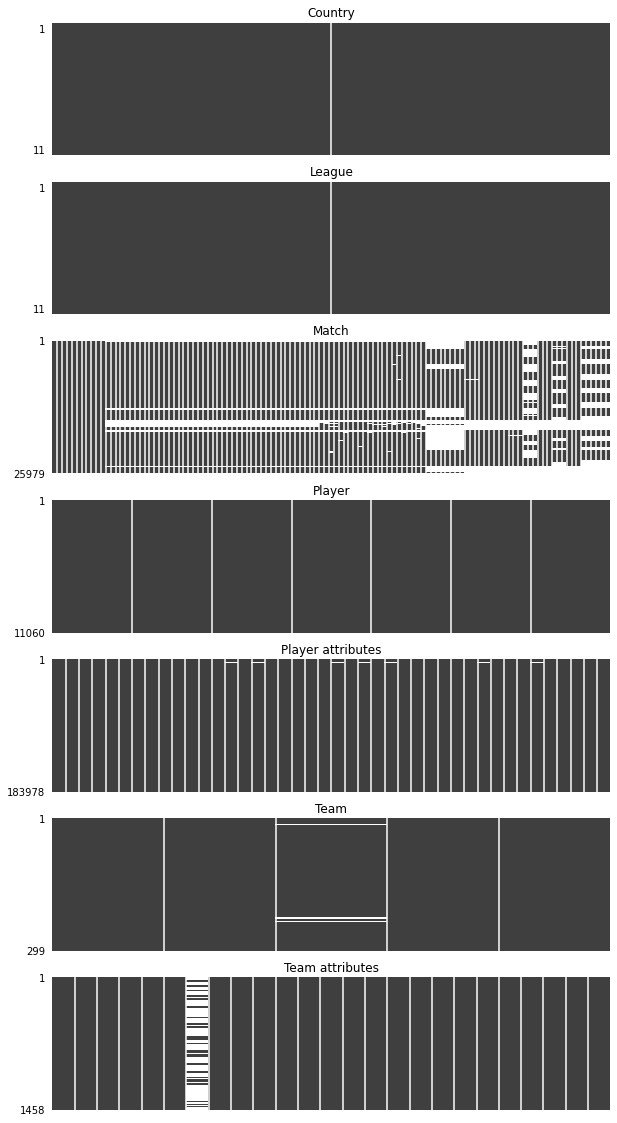

In [9]:
fig, ax = plt.subplots(7, figsize=(10, 20))
tables = [country, league, match, player, player_at, team, team_at]
names = [
    "Country",
    "League",
    "Match",
    "Player",
    "Player attributes",
    "Team",
    "Team attributes",
]
for idx, axi in enumerate(ax):
    msno.matrix(tables[idx], sparkline=False, labels=False, fontsize=8, ax=axi)
    axi.set_title(names[idx])

In [10]:
player

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


In [11]:
team

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


Quick missing data inspection shows that most the  
most information is missing from Match and Team  
attributes tables.

In [12]:
for table in tables:
    print(table.duplicated().any())

False
False
False
False
False
False
False


There seems to be no complete duplicates in the data.

## Checking whats missing

Lets look at the match data first as it has  
the most missing values.

In [13]:
match_na = match.isna().sum()
pd.DataFrame(match_na[match_na > 0]).T

,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1821,1821,1832,1832,1832,1832,1832,1832,1832,1832,...,8882,3411,3411,3411,11817,11817,11817,11818,11818,11818


1832 matches seem to have no data on the player id,  
there is also missing data for betting companies and  
other match statistics like goals metadata.  

Lets see how the missing goal data is dispersed throughout  
the different football leagues.

In [14]:
missing_country_ids = (
    match.loc[~match.notnull().goal].groupby("country_id").country_id.count()
)
not_missing_country_ids = (
    match.loc[match.notnull().goal].groupby("country_id").country_id.count()
)
missing_country_ids = missing_country_ids.rename("Missing goal metadata")
not_missing_country_ids = not_missing_country_ids.rename("Not missing goal metadata")

In [15]:
match_na_df = (
    league.merge(
        missing_country_ids,
        how="outer",
        left_on="country_id",
        right_index=True,
        suffixes=["_league", "_miss"],
    )
    .merge(
        not_missing_country_ids, how="outer", left_on="country_id", right_index=True
    )[["name", "Missing goal metadata", "Not missing goal metadata"]]
    .replace(np.nan, 0)
)
match_na_df.columns = ["League", "Missing goal metadata", "Not missing goal metadata"]
match_na_df.sort_values("Missing goal metadata", ascending=False).style.format(
    precision=0
)

,League,Missing goal metadata,Not missing goal metadata
7,Portugal Liga ZON Sagres,2052,0
5,Netherlands Eredivisie,1918,530
6,Poland Ekstraklasa,1913,7
8,Scotland Premier League,1811,13
0,Belgium Jupiler League,1728,0
10,Switzerland Super League,1322,100
2,France Ligue 1,1014,2026
4,Italy Serie A,3,3014
9,Spain LIGA BBVA,1,3039
1,England Premier League,0,3040


Only England and Germany have no missing goal metadata which  
includes which player made the goal and the type of the goal.

In [16]:
player_at_na = player_at.isna().sum()
pd.DataFrame(player_at_na[player_at_na > 0]).T

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,836,836,836,3230,836,836,836,836,836,2713,...,2713,836,836,836,2713,836,836,836,836,836


In [17]:
team_at.isna().sum()[team_at.isna().sum() > 0]

buildUpPlayDribbling    969
dtype: int64

Some stats are also missing from player and team attributes.

In [18]:
team.isna().sum()

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

In [19]:
team[team.isna().any(axis=1)].team_long_name

8                     FCV Dender EH
14                           Tubize
170                     FC Volendam
204    Termalica Bruk-Bet Nieciecza
208                        Trofense
213                         Amadora
223                    Portimonense
225                        Feirense
232                Uniao da Madeira
233                         Tondela
298                          Lugano
Name: team_long_name, dtype: object

Also some teams are missing fifa api ids.

In [20]:
tables_with_dates = [match, team_at, player_at]
for table in tables_with_dates:
    table["date"] = pd.to_datetime(table["date"], format="%Y-%m-%d 00:00:00")

In [21]:
sorted(match.date.dt.year.unique())

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

In [22]:
sorted(team_at.date.dt.year.unique())

[2010, 2011, 2012, 2013, 2014, 2015]

In [23]:
sorted(player_at.date.dt.year.unique())

[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

Data in most tables is gathered from 2010 to 2015.

# Data exploration

## Which league scores most

In [24]:
league_country = ddb.query(
    """
    SELECT league.country_id,
           league.name as league,
           country.name as country
    FROM league league
    JOIN country country
    ON league.country_id = country.id
    """
).to_df()

In [25]:
league_goals = ddb.query(
    """
    SELECT leagues.country,
           leagues.league,
           total_goals.sum_goals::int as goals
    FROM (SELECT country_id,
                 SUM(home_team_goal) + SUM(away_team_goal) as sum_goals
          FROM match
          GROUP BY country_id
          ORDER BY sum_goals DESC) total_goals
    JOIN league_country leagues
    ON leagues.country_id = total_goals.country_id
    """
).to_df()
league_goals

,country,league,goals
0,Spain,Spain LIGA BBVA,8412
1,England,England Premier League,8240
2,Italy,Italy Serie A,7895
3,Netherlands,Netherlands Eredivisie,7542
4,France,France Ligue 1,7427
5,Germany,Germany 1. Bundesliga,7103
6,Portugal,Portugal Liga ZON Sagres,5201
7,Belgium,Belgium Jupiler League,4841
8,Scotland,Scotland Premier League,4804
9,Poland,Poland Ekstraklasa,4656


Most goals are scored in the Spain and England  
leagues, this data is also unaffected by the  
missing goal metadata, because home and away  
team goals are present for all entries.

## Which team has most wins

In [26]:
most_wins = ddb.query(
    """
    WITH match_res(home_team, away_team, home_team_goal, away_team_goal) as
         (SELECT home.team_long_name as home_team,
                 away.team_long_name as away_team,
                 match.home_team_goal,
                 match.away_team_goal
          FROM match match
          JOIN team as home
          ON match.home_team_api_id = home.team_api_id
          JOIN team as away
          ON match.away_team_api_id = away.team_api_id)
    
    SELECT wins.won_id as team_name,
           COUNT(*) as won_games
    FROM (SELECT CASE WHEN match_res.home_team_goal > match_res.away_team_goal THEN match_res.home_team
                      WHEN match_res.home_team_goal < match_res.away_team_goal THEN match_res.away_team
                      END AS won_id
          FROM match_res) wins
    GROUP BY wins.won_id
    ORDER BY 2 DESC
    """
).to_df()
most_wins.dropna(inplace=True)
most_wins.head()

,team_name,won_games
1,FC Barcelona,234
2,Real Madrid CF,228
3,Celtic,218
4,FC Bayern Munich,193
5,Manchester United,192


## Player attributes

Player table contains some data on physical attributes  
lets explore them a bit.

### Player ages

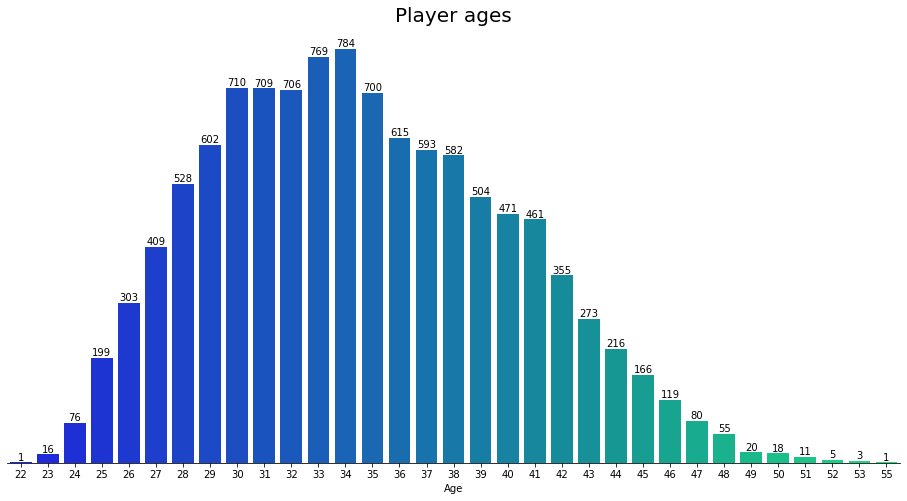

In [27]:
player["age"] = ddb.query(
    """
    SELECT EXTRACT(YEAR from CURRENT_DATE - birthday::datetime) as age
    FROM player
    """
).to_df()
fig, ax = plt.subplots(figsize=(16, 8))
ax = sns.countplot(x=player["age"], palette="winter")
vert_annot(ax, 0)
sns.despine(left=True)
ax.set_xlabel("Age")
ax.set_ylabel("")
ax.set_yticks([])
ax.set_title("Player ages", fontsize=20)
plt.show()

Most players are in their 30's.

### Player BMI's

In [28]:
weight_kilos = player.weight * 0.45359
height_square = (player.height / 100) ** 2
player["BMI"] = weight_kilos / height_square

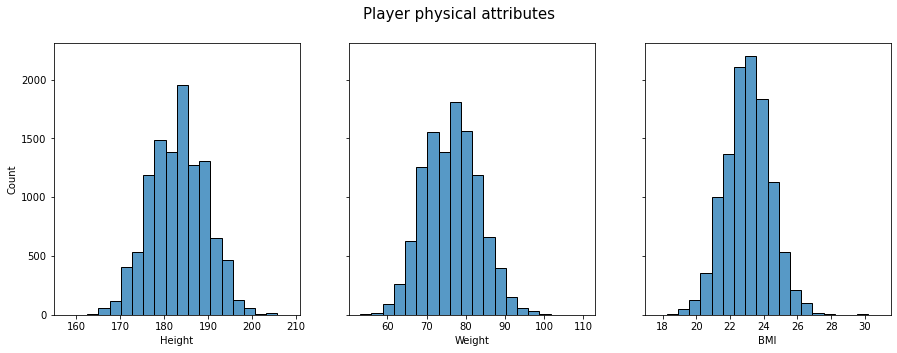

In [29]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
ax0 = sns.histplot(player.height, bins=20, ax=ax[0])
ax1 = sns.histplot(weight_kilos, bins=20, ax=ax[1])
ax2 = sns.histplot(player.BMI, bins=20, ax=ax[2])
for axi in ax[:2]:
    axi.set_xlabel(axi.get_xlabel().capitalize())
plt.suptitle("Player physical attributes", fontsize=15)
plt.show()

Normal BMI is between 18.5 and 24.9, some players seem to  
have higher BMI values, might be because of added muscle  
mass.

## Player performance ratings

Lets check the stats of players.

In [30]:
game_stats = player_at.drop(
    [
        "id",
        "player_fifa_api_id",
        "player_api_id",
        "date",
        "preferred_foot",
        "attacking_work_rate",
        "defensive_work_rate",
    ],
    axis=1,
)

In [31]:
def pretty_names(names: list[str]) -> list[str]:
    out_names = []
    for name in names:
        out_names.append(" ".join(name.get_text().capitalize().split("_")))
    return out_names

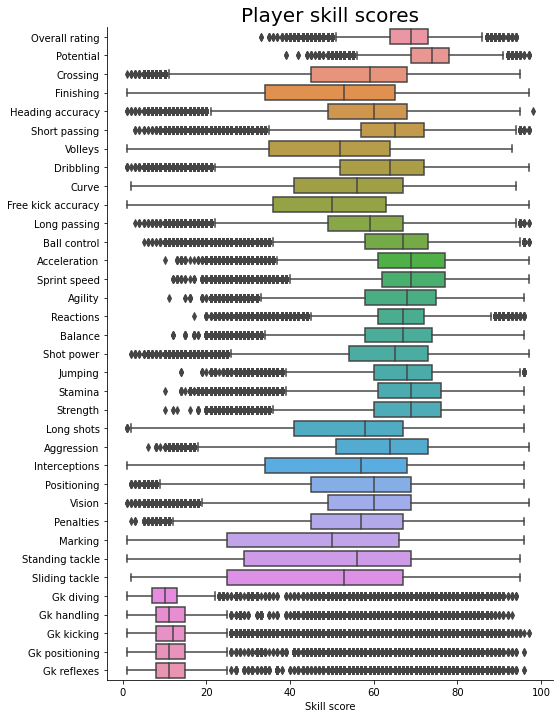

In [32]:
fig, ax = plt.subplots(figsize=(8, 12))
ax = sns.boxplot(data=game_stats, orient="h")
ax.set_yticklabels(pretty_names(ax.get_yticklabels()))
ax.set_title("Player skill scores", fontsize=20)
ax.set_xlabel("Skill score")
sns.despine()
plt.show()

We can see that player have wide range of skill values,  
exceptions for Gk (goalkeepers) probably comes from the  
fact that most players in the team are not goalkeepers,  
so the median rating of goalkeeper specific abilities is  
lower than for other skills.

## Which players score most

### Individual players

In [33]:
def parse_xml_goals(df: pd.DataFrame) -> pd.DataFrame:
    goals = []
    for _, row in df.iterrows():
        if not row.goal is None:
            date = row.date
            league_id = row.country_id
            match_goals_xml = row.goal
            # matches player_id and team_id of the one who made the goal and checks if the goal counted
            re_pattern = re.compile(
                r"<player1>(.*?)<\/player1>.*?<team>(.*?)<\/team>.*?<goal_type>(.*?)<\/goal_type>"
            )
            for player_id, team_id, goal_type in re.findall(
                re_pattern, match_goals_xml
            ):
                if goal_type in ["n", "p", "o"]:
                    goals.append([date, league_id, team_id, int(player_id), goal_type])
    return pd.DataFrame(
        goals, columns=["date", "country_id", "team_id", "player_id", "goal_type"]
    )

In [34]:
goal_counts = parse_xml_goals(match)

In [35]:
most_scoring = ddb.query(
    """
    SELECT goals.player_id,
           player.player_name as 'Player name',
           COUNT(*) as 'Goals'
    FROM goal_counts goals
    JOIN player player
    ON goals.player_id = player.player_api_id
    WHERE goal_type in ('n', 'p')
    GROUP BY 1,2
    ORDER BY 3 DESC
    """
).to_df()
most_scoring[["Player name", "Goals"]].head(10)

,Player name,Goals
0,Lionel Messi,281
1,Cristiano Ronaldo,277
2,Zlatan Ibrahimovic,195
3,Gonzalo Higuain,166
4,Edinson Cavani,158
5,Sergio Aguero,152
6,Antonio Di Natale,147
7,Luis Suarez,128
8,Wayne Rooney,125
9,Robert Lewandowski,121


Most scoring players overall.

In [36]:
most_scoring_club_players = ddb.query(
    """
    SELECT team.team_long_name as 'Team',
           goals_table.player_id,
           player.player_name as 'Player name',
           COUNT(goals_table.player_id) as 'Goals'
    FROM goal_counts goals_table
    JOIN player player
    ON goals_table.player_id = player.player_api_id
    JOIN team team
    ON goals_table.team_id = team.team_api_id
    GROUP BY 1,2,3
    ORDER BY 4 DESC
    """
).to_df()
most_scoring_club_players.groupby("Team").head(1).head(10)[
    ["Team", "Player name", "Goals"]
]

,Team,Player name,Goals
0,FC Barcelona,Lionel Messi,281
1,Real Madrid CF,Cristiano Ronaldo,260
2,Udinese,Antonio Di Natale,147
3,Manchester United,Wayne Rooney,126
4,Paris Saint-Germain,Zlatan Ibrahimovic,113
6,Bayer 04 Leverkusen,Stefan Kiessling,110
7,Manchester City,Sergio Aguero,102
9,FC Bayern Munich,Thomas Mueller,91
10,Roma,Francesco Totti,82
11,FC Schalke 04,Klaas Jan Huntelaar,81


Logically most scoring player overall are most  
scoring player in clubs even if they changed a  
couple of clubs throughout the years.

The goal column with metadata that contains additional  
information about who made the also contains extra info  
about the goal, for example goals into your own gates.  
Lets see who made the most own goals.

In [37]:
own_goals = ddb.query(
    """
    SELECT league.name as 'League',
           own_goals.player_name as 'Player name',
           own_goals.num_goals as 'Own goals',
           most_scoring.Goals as 'Good goals'
    FROM (SELECT goals.player_id,
                 goals.country_id,
                 player.player_name,
                 COUNT(*) as num_goals
          FROM goal_counts goals
          JOIN player player
          ON goals.player_id = player.player_api_id
          WHERE goal_type = 'o'
          GROUP BY 1,2,3
          ORDER BY 4 DESC) own_goals
    JOIN most_scoring most_scoring
    ON own_goals.player_id = most_scoring.player_id
    JOIN league league
    ON own_goals.country_id = league.country_id
    """
).to_df()
own_goals.head(10)

,League,Player name,Own goals,Good goals
0,England Premier League,Martin Skrtel,7,16
1,England Premier League,Richard Dunne,6,5
2,England Premier League,Gareth McAuley,5,9
3,England Premier League,Kamil Zayatte,4,3
4,England Premier League,Wes Brown,4,2
5,England Premier League,Scott Dann,4,11
6,England Premier League,Chris Baird,4,4
7,Italy Serie A,Davide Astori,4,4
8,Netherlands Eredivisie,Sven van Beek,4,2
9,England Premier League,Ryan Shawcross,3,12


From the data we have it seems some players are  
pretty unlucky with scoring in their own gates  
and that the worst offenders are from England.

### By league

In [38]:
most_scoring_league_players = ddb.query(
    """
    SELECT league.name as 'League',
           goals.player_id,
           player.player_name as 'Player name',
           COUNT(goals.player_id) as 'Goals'
    FROM goal_counts goals
    JOIN player player
    ON goals.player_id = player.player_api_id
    JOIN league league
    ON goals.country_id = league.country_id
    GROUP BY 1, 2, 3
    ORDER BY 4 DESC
    """
).to_df()
most_scoring_league_players.groupby("League").head(1)[
    ["League", "Player name", "Goals"]
]

,League,Player name,Goals
0,Spain LIGA BBVA,Lionel Messi,281
2,Italy Serie A,Antonio Di Natale,147
3,England Premier League,Wayne Rooney,126
4,Germany 1. Bundesliga,Robert Lewandowski,121
6,France Ligue 1,Zlatan Ibrahimovic,113
113,Netherlands Eredivisie,Luuk de Jong,44
613,Switzerland Super League,Guillaume Hoarau,17
1490,Scotland Premier League,Kenny Miller,7
2780,Poland Ekstraklasa,Artjoms Rudnevs,3


The same logic as before applies to league data,  
though here we can notice the effects of the missing  
goal metadata for some leagues.

### By year

In [39]:
most_scoring_by_year = ddb.query(
    """
    SELECT EXTRACT(YEAR from goals.date::timestamp) as 'Year',
           goals.player_id,
           player.player_name as 'Player name',
           COUNT(goals.player_id) as 'Goals'
    FROM goal_counts goals
    JOIN player player
    ON goals.player_id = player.player_api_id
    JOIN team team
    ON goals.team_id = team.team_api_id
    GROUP BY 1, 2, 3
    ORDER BY 4 DESC
    """
).to_df()

most_scoring_by_year_ranked = most_scoring_by_year.copy()
most_scoring_by_year_ranked["Ranking"] = (
    most_scoring_by_year.sort_values(["Year", "Goals"], ascending=[True, False])
    .groupby("Year")
    .cumcount()
    + 1
)

most_scoring_by_year_ranked = (
    most_scoring_by_year_ranked.groupby("Year").head(5).sort_values(["Year", "Ranking"])
)

most_scoring_by_year_ranked = most_scoring_by_year_ranked.set_index(
    pd.MultiIndex.from_arrays(
        [most_scoring_by_year_ranked.Year, most_scoring_by_year_ranked.Ranking]
    )
)
idx = pd.IndexSlice
slice1_ = idx[most_scoring_by_year_ranked.index.get_level_values(0).unique()[0::2], :]
slice2_ = idx[most_scoring_by_year_ranked.index.get_level_values(0).unique()[1::2], :]
display(
    most_scoring_by_year_ranked[["Player name", "Goals"]]
    .style.set_properties(**{"background-color": "#6D8299"}, subset=slice1_)
    .set_properties(**{"background-color": "#000000"}, subset=slice2_)
)

Top scorers remain the same.

## Top players

It seems likely that top scorers will  
also rated the highest, lets check it out.

In [40]:
player_overall_ratings = ddb.query(
    """
    SELECT player.player_name,
           player.player_api_id,
           EXTRACT(year from attributes.date::timestamp) as date,
           attributes.overall_rating
    FROM player player
    JOIN player_at attributes
    ON player.player_fifa_api_id = attributes.player_fifa_api_id
    """
).to_df()
player_overall_ratings = (
    player_overall_ratings.groupby(["date", "player_name"]).agg(np.max).reset_index()
)

In [41]:
player_overall_ratings_by_year = ddb.query(
    """
    SELECT *
    FROM (SELECT player_name as 'Player name',
                 date as 'Year',
                 overall_rating as 'Overall rating',
                 ROW_NUMBER()
                     OVER(
                     PARTITION BY date
                     ORDER BY overall_rating DESC
                     ) as 'Ranking'
          FROM player_overall_ratings) ranked_by_year
    WHERE ranked_by_year.Ranking <= 5
    ORDER BY 2, 3 DESC 
    """
).to_df()

player_overall_ratings_by_year = player_overall_ratings_by_year.set_index(
    pd.MultiIndex.from_arrays(
        [player_overall_ratings_by_year.Year, player_overall_ratings_by_year.Ranking]
    )
)
player_overall_ratings_by_year[["Player name", "Overall rating"]]
idx = pd.IndexSlice
slice1_ = idx[
    player_overall_ratings_by_year.index.get_level_values(0).unique()[0::2], :
]
slice2_ = idx[
    player_overall_ratings_by_year.index.get_level_values(0).unique()[1::2], :
]
display(
    player_overall_ratings_by_year[["Player name", "Overall rating"]]
    .style.format(precision=0)
    .set_properties(**{"background-color": "#6D8299"}, subset=slice1_)
    .set_properties(**{"background-color": "#000000"}, subset=slice2_)
)

## Do physical traits influence player rating

Lets see if players with higher BMI have higher overall  
ratings than those with lower BMI.

Because ratings are from multiple year lets choose one  
year on which to check this.

In [42]:
player_at_by_year = ddb.query(
    """
    SELECT EXTRACT(YEAR from date::timestamp) as year,
           player_api_id as player_id,
           AVG(overall_rating) as avg_overall
    FROM player_at
    GROUP BY 1,2
    """
).to_df()

In [43]:
bmi_vs_rating = player_at_by_year.merge(
    player, left_on="player_id", right_on="player_api_id"
)
bmi_vs_rating.drop(
    ["player_api_id", "id", "player_fifa_api_id", "birthday"], axis=1, inplace=True
)

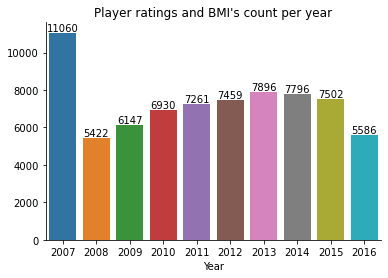

In [44]:
ax = sns.countplot(bmi_vs_rating.year)
vert_annot(ax)
ax.set_ylabel("")
ax.set_xlabel("Year")
ax.set_title("Player ratings and BMI's count per year")
sns.despine()
plt.show()

Lets go with 2015 as it is relatively recent as has  
a bit more entries than 2016.

In [45]:
bmi_vs_rating = bmi_vs_rating[bmi_vs_rating.year == 2015]
high_bmi = bmi_vs_rating[bmi_vs_rating.BMI > 26].avg_overall
low_bmi = bmi_vs_rating[bmi_vs_rating.BMI < 20].avg_overall

In [46]:
print(
    f"High BMI mean rating: {high_bmi.mean():.3f}, standart deviation: {high_bmi.std():.3f}, sample size: {high_bmi.size}"
)
print(
    f"Low BMI mean rating: {low_bmi.mean():.3f}, standart deviation: {low_bmi.std():.3f}, sample size: {low_bmi.size}"
)

High BMI mean rating: 69.716, standart deviation: 6.125, sample size: 140
Low BMI mean rating: 66.402, standart deviation: 6.030, sample size: 76


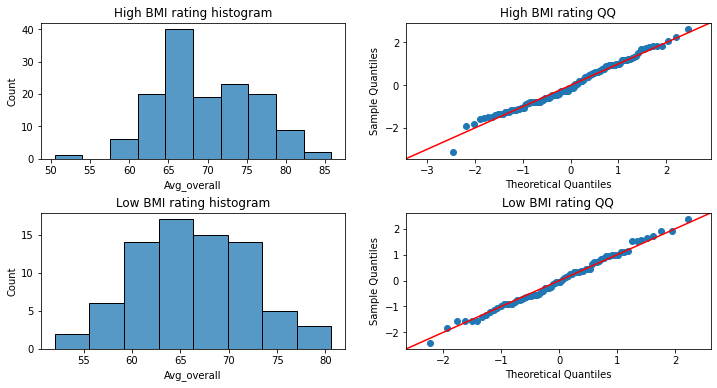

In [47]:
fig, ax = plt.subplots(2, 2, figsize=(12, 6))
fig.subplots_adjust(hspace=0.4)
plot_hist(high_bmi, ax[0][0], "High BMI rating histogram")
plot_hist(low_bmi, ax[1][0], "Low BMI rating histogram")
plot_qq(high_bmi, ax[0][1], "High BMI rating QQ")
plot_qq(low_bmi, ax[1][1], "Low BMI rating QQ")

In [48]:
p_value, mean_diff, diffs = permute_p(high_bmi, low_bmi, 100000, alt="greater")
print(f"Permuted p-value: {p_value:.3f}, mean difference: {mean_diff:.2f}")

Permuted p-value: 0.000, mean difference: 3.31


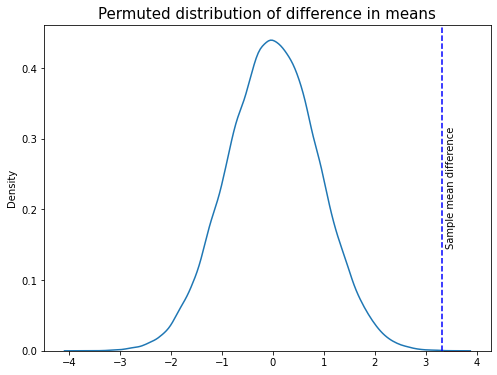

In [49]:
plot_pvalue(diffs, mean_diff, p_value, alt="greater")

Seems like the hypothesis is actually true and players with  
higher BMI's have higher average overall ratings.

# Is home advantage real

In [50]:
home_advantage = ddb.query(
    """
    SELECT results.match_result as 'Outcome',
           COUNT(*) as 'Wins'
    FROM (SELECT CASE WHEN match.home_team_goal > match.away_team_goal THEN 'Home win'
                      WHEN match.home_team_goal < match.away_team_goal THEN 'Away win'
                      ELSE 'Draw'
                 END AS match_result
          FROM match match
          WHERE match.home_team_goal IS NOT NULL AND
                match.away_team_goal IS NOT NULL) as results
    GROUP BY results.match_result
    """
).to_df()
home_advantage["Percentage outcome"] = home_advantage.Wins / home_advantage.Wins.sum()
home_advantage["Percentage outcome"] = home_advantage["Percentage outcome"].apply(
    "{:.0%}".format
)
home_advantage

,Outcome,Wins,Percentage outcome
0,Draw,6596,25%
1,Away win,7466,29%
2,Home win,11917,46%


Seems like home advantage might actually be a thing,  
46% of wins are home team wins.

# Predicting match outcome

Let's try to predict the outcome of a match using  
other information in the dataset.

## Preparation for modeling

### Prepare the data

I will build features mostly from the player and  
team attributes that are available in the data.

In [51]:
cols_keep = [
    "id",
    "date",
    "match_api_id",
    "home_team_api_id",
    "away_team_api_id",
    "home_team_goal",
    "away_team_goal",
    "B365H",
    "B365D",
    "B365A",
]
home_players = ["home_player_" + str(x) for x in range(1, 12)]
away_players = ["away_player_" + str(x) for x in range(1, 12)]
cols_keep = cols_keep + home_players + away_players
all_players = home_players + away_players

In [52]:
reduced_match = match[cols_keep]
reduced_match = reduced_match.dropna()
reduced_match = reduced_match.sort_values("date")

In [53]:
keep_player_at = [
    "player_api_id",
    "date",
    "overall_rating",
]

In [54]:
reduced_player_at = player_at[keep_player_at]
reduced_player_at = reduced_player_at.dropna()
reduced_player_at = reduced_player_at.sort_values("date")

Data about player and team attributes is added using  
`merge_asof` matching on the last date when the data  
was updated before the current date.

In [55]:
for player_col in all_players:
    reduced_match[player_col] = reduced_match[player_col].astype("int64")
    player_rating = reduced_player_at.rename(
        columns={col: f"{col}_{player_col}" for col in keep_player_at[1:]}
    )
    reduced_match = pd.merge_asof(
        reduced_match,
        player_rating,
        left_by=[player_col],
        right_by=["player_api_id"],
        left_on=["date"],
        right_on=[f"date_{player_col}"],
        allow_exact_matches=False,
    )
    reduced_match = reduced_match.drop(
        [f"date_{player_col}", player_col, "player_api_id"], axis=1
    )

In [56]:
keep_team_at = [
    team_at.columns[i]
    for i, at in enumerate(team_at.dtypes)
    if at in ["int64", "datetime64[ns]"]
]

In [57]:
keep_team_at

['id',
 'team_fifa_api_id',
 'team_api_id',
 'date',
 'buildUpPlaySpeed',
 'buildUpPlayPassing',
 'chanceCreationPassing',
 'chanceCreationCrossing',
 'chanceCreationShooting',
 'defencePressure',
 'defenceAggression',
 'defenceTeamWidth']

In [58]:
# Droping first two values as they won't be needed
reduced_team_at = team_at[keep_team_at[2:]]
reduced_team_at = reduced_team_at.dropna()
reduced_team_at = reduced_team_at.sort_values("date")

In [59]:
for team_side_id in ["home_team_api_id", "away_team_api_id"]:
    team_rating = reduced_team_at.rename(
        columns={at: f"{team_side_id[:9]}_{at}" for at in keep_team_at[4:]}
    )
    reduced_match = pd.merge_asof(
        reduced_match,
        team_rating,
        left_by=[team_side_id],
        right_by=["team_api_id"],
        left_on=["date"],
        right_on=["date"],
    )
    reduced_match = reduced_match.drop(["team_api_id"], axis=1)

In [60]:
reduced_match.dropna(inplace=True)

In [61]:
reduced_match["goal_diff"] = reduced_match.home_team_goal - reduced_match.away_team_goal
reduced_match["outcome"] = "D"
reduced_match["outcome"] = np.where(
    reduced_match.goal_diff > 0, "W", reduced_match.outcome
)
reduced_match["outcome"] = np.where(
    reduced_match.goal_diff < 0, "L", reduced_match.outcome
)

In [62]:
y = reduced_match["outcome"]
X_goal = reduced_match.drop(
    ["id", "date", "match_api_id", "home_team_api_id", "away_team_api_id"],
    axis=1,
)
X = reduced_match.drop(
    [
        "id",
        "date",
        "match_api_id",
        "home_team_api_id",
        "away_team_api_id",
        "home_team_goal",
        "away_team_goal",
        "goal_diff",
        "outcome",
    ],
    axis=1,
)

In [63]:
home_players2 = ["overall_rating_" + player for player in home_players]
away_players2 = ["overall_rating_" + player for player in away_players]

home_team = ["home_team_" + team_stat for team_stat in keep_team_at[4:]]
away_team = ["away_team_" + team_stat for team_stat in keep_team_at[4:]]

In [64]:
X["home_total_rating"] = X[home_players2].sum(axis=1)
X["home_average_rating"] = X[home_players2].mean(axis=1)
X["home_rating_std"] = X[home_players2].std(axis=1)

X["away_total_rating"] = X[away_players2].sum(axis=1)
X["away_average_rating"] = X[away_players2].mean(axis=1)
X["away_rating_std"] = X[away_players2].std(axis=1)

X["home_team_stat_sum"] = X[home_team].sum(axis=1)
X["home_team_stat_average"] = X[home_team].mean(axis=1)
X["home_team_stat_std"] = X[home_team].std(axis=1)

X["away_team_stat_sum"] = X[away_team].sum(axis=1)
X["away_team_stat_average"] = X[away_team].mean(axis=1)
X["away_team_stat_std"] = X[away_team].std(axis=1)

In [65]:
X.head()

,B365H,B365D,B365A,overall_rating_home_player_1,overall_rating_home_player_2,overall_rating_home_player_3,overall_rating_home_player_4,overall_rating_home_player_5,overall_rating_home_player_6,overall_rating_home_player_7,...,home_rating_std,away_total_rating,away_average_rating,away_rating_std,home_team_stat_sum,home_team_stat_average,home_team_stat_std,away_team_stat_sum,away_team_stat_average,away_team_stat_std
3275,1.57,4.00,5.5,72.0,77.0,82.0,76.0,80.0,78.0,76.0,...,4.635829,820.0,74.545455,2.696799,420.0,52.500,14.638501,340.0,42.500,13.627703
3276,1.20,6.50,15.0,74.0,76.0,78.0,88.0,85.0,82.0,74.0,...,5.236237,814.0,74.000000,4.358899,425.0,53.125,13.076014,369.0,46.125,18.145739
3277,2.10,3.30,3.5,78.0,75.0,76.0,75.0,74.0,78.0,74.0,...,3.065942,814.0,74.000000,5.567764,369.0,46.125,15.815341,345.0,43.125,11.933596
3278,2.90,3.10,2.5,86.0,74.0,76.0,74.0,78.0,81.0,76.0,...,3.901049,901.0,81.909091,2.508168,402.0,50.250,14.210157,370.0,46.250,14.577380
3279,2.50,3.25,2.8,66.0,67.0,68.0,64.0,65.0,66.0,67.0,...,1.963300,736.0,66.909091,2.071451,300.0,37.500,13.093073,310.0,38.750,14.330288


In the end we are left with 53 features.

### Setting a desired metric to optimize

For this task the end goal could be being able  
to make a profit from betting. Of course a model  
that is 100% accurate will be the most profitable,  
but if it doesn't reach that perfection then it is  
more advantageous to make good predictions on match  
outcomes with high odds as it can offset mistakes  
on a couple of predictions with lower odds. To this  
end I will use a custom loss function that rates a   
model on the profit it makes.

In [66]:
bet_prob = X[["B365H", "B365A", "B365D"]]


def my_scorer(estimator: Callable, X: pd.DataFrame, y: pd.DataFrame) -> float:
    """
    Scoring function that calculates the betting profit for predictions
    """
    bet = 10
    earnings = 0
    y_pred = estimator.predict(X)

    earnings = (
        earnings
        + bet_prob.loc[X.index][(y_pred == y) & (y_pred == "W")]["B365H"].sum() * bet
    )
    earnings = (
        earnings
        + bet_prob.loc[X.index][(y_pred == y) & (y_pred == "L")]["B365A"].sum() * bet
    )
    earnings = (
        earnings
        + bet_prob.loc[X.index][(y_pred == y) & (y_pred == "D")]["B365D"].sum() * bet
    )

    earnings = earnings - len(y) * bet
    return earnings

### Setting a benchmark

To compare how good our model is we can use  
the data already in the dateset i.e., the  
betting company predictions. For this I will  
use the Bet365 data as it is present for most  
of the matches.

In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, stratify=y, random_state=42
)

In [68]:
def get_bet_pred(X: pd.DataFrame) -> pd.DataFrame:
    """
    Function to extract Bet365 odds from data
    """
    return (
        X[["B365H", "B365D", "B365A"]]
        .idxmin(axis=1)
        .map({"B365H": "W", "B365D": "D", "B365A": "L"})
    )


def plot_betting_pred(X, y, normalize=None, display_labels=[]):
    """
    Plots confusion matrix without passing a predictor
    """
    y_pred = get_bet_pred(X)
    cm = confusion_matrix(y, y_pred, normalize=normalize)
    disp = ConfusionMatrixDisplay(cm, display_labels=display_labels)
    disp.plot(colorbar=False)
    plt.show()


def calc_bet_profit(X: np.ndarray, y_true: np.ndarray) -> float:
    """
    Simulate betting 10 euros on the match outcome
    that is held most likely by the betting company
    i.e., the outcome with lowest odds
    """
    bet = 10
    earnings = 0
    y_pred = get_bet_pred(X)

    earnings = earnings + X[(y_pred == y_true) & (y_pred == "W")]["B365H"].sum() * bet
    earnings = earnings + X[(y_pred == y_true) & (y_pred == "L")]["B365A"].sum() * bet
    earnings = earnings + X[(y_pred == y_true) & (y_pred == "D")]["B365D"].sum() * bet

    earnings = earnings - len(y_true) * bet
    return earnings

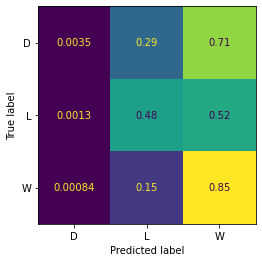

In [69]:
plot_betting_pred(X, y, normalize="true", display_labels=["D", "L", "W"])

The most likely outcome according to the betting companies  
should be the one with the lowest odds. From the confusion  
matrix we can see that the betting companies are mostly   
predicting home team wins and are struggling with draws.

In [70]:
print(classification_report(get_bet_pred(X), y))

              precision    recall  f1-score   support

           D       0.00      0.54      0.01        26
           L       0.48      0.50      0.49      4380
           W       0.85      0.54      0.66     11306

    accuracy                           0.53     15712
   macro avg       0.45      0.53      0.39     15712
weighted avg       0.75      0.53      0.61     15712



Overall the betting companies achieve 53% accuracy and  
perform best on home wins.  

Let's also try to see if betting on the most likely outcome  
gives us a positive product. Hint: if the betting company wants   
to make money we should not be able to make money betting this way.

In [71]:
print(
    f"Money made from betting on low odds outcomes: {round(calc_bet_profit(X, y), 2)}"
)

Money made from betting on low odds outcomes: -6940.9


Betting on low odds doesn't seem like a good strategy.  
Now for the benchmark.

In [72]:
print(
    f"So the benchmark for our models should be at least {accuracy_score(y_test, get_bet_pred(X_test)):.0%} accuracy\n"
    f"and more importantly a monetary loss no greater than {calc_bet_profit(X_test, y_test):.0f}."
)

So the benchmark for our models should be at least 54% accuracy
and more importantly a monetary loss no greater than -825.


## Logistic regression

Let's start with a simple logistic regression model.

In [73]:
log = Pipeline(
    [
        ("scale", StandardScaler()),
        (
            "log",
            LogisticRegression(
                penalty="elasticnet",
                solver="saga",
                max_iter=10000,
            ),
        ),
    ]
)

In [74]:
params = {"log__l1_ratio": stats.uniform(0, 1), "log__C": stats.loguniform(1e-3, 1e3)}

In [75]:
log_cv = RandomizedSearchCV(
    log,
    param_distributions=params,
    n_iter=20,
    scoring=my_scorer,
    n_jobs=-1,
    random_state=rng,
)

Using `RandomSearchCV` for regularization optimization.

In [76]:
# log_cv.fit(X_train, y_train)

In [77]:
# with open("log_cv.dump", "wb") as f:
#    joblib.dump(log_cv, f)

In [78]:
with open("log_cv.dump", "rb") as f:
    log_cv = joblib.load(f)

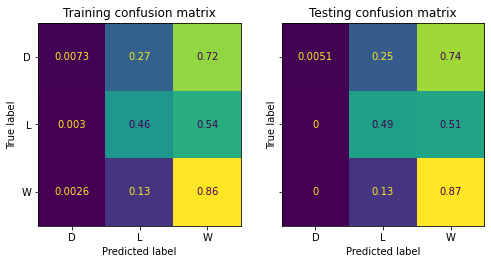

In [79]:
compare_cf_matrix(log_cv, X_train, X_test, y_train, y_test)
plt.grid(False)

In [80]:
print(classification_report(y_test, log_cv.predict(X_test)))

              precision    recall  f1-score   support

           D       1.00      0.01      0.01       791
           L       0.54      0.49      0.51       916
           W       0.54      0.87      0.67      1436

    accuracy                           0.54      3143
   macro avg       0.69      0.46      0.40      3143
weighted avg       0.66      0.54      0.46      3143



In [81]:
round(my_scorer(log_cv, X_test, y_test), 2)

-744.9

Our logistic regression model just like the betting  
companies doesn't do a good job predicting home wins  
and even predicts more losses as wins. It also doesn't  
give a good profit. On the bright side it achieves the  
minimum benchmark we set earlier.

In [82]:
pd.DataFrame(log_cv.cv_results_).sort_values("rank_test_score").head(5).iloc[:, 4:]

,param_log__C,param_log__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.048485,0.542696,"{'log__C': 0.0484849618387329, 'log__l1_ratio'...",-1309.2,-889.5,-71.3,-1036.6,-1741.8,-1009.68,551.622492,1
3,0.074177,0.520068,"{'log__C': 0.07417652034871829, 'log__l1_ratio...",-1220.6,-871.6,-223.6,-1086.4,-1647.8,-1010.00,467.879831,2
8,0.003396,0.195983,"{'log__C': 0.0033959009331627505, 'log__l1_rat...",-1327.1,-656.9,-373.9,-1099.4,-1669.4,-1025.34,462.921024,3
19,0.141512,0.115869,"{'log__C': 0.14151235919053706, 'log__l1_ratio...",-1283.6,-872.2,-271.7,-1163.5,-1625.9,-1043.38,455.248642,4
2,0.035701,0.662522,"{'log__C': 0.03570095960030949, 'log__l1_ratio...",-1321.7,-858.9,-90.8,-1158.9,-1795.8,-1045.22,565.396736,5


Looking at cross validation results looks like the  
the the amount of profit you make wildly depends on  
the data split, with top 5 model test score standard  
deviations being around 500.

In [83]:
pd.DataFrame(
    log_cv.best_estimator_["log"].coef_, columns=X.columns, index=["D", "L", "W"]
)

,B365H,B365D,B365A,overall_rating_home_player_1,overall_rating_home_player_2,overall_rating_home_player_3,overall_rating_home_player_4,overall_rating_home_player_5,overall_rating_home_player_6,overall_rating_home_player_7,...,home_rating_std,away_total_rating,away_average_rating,away_rating_std,home_team_stat_sum,home_team_stat_average,home_team_stat_std,away_team_stat_sum,away_team_stat_average,away_team_stat_std
D,0.000000,-0.186777,0.000000,0.015009,0.000000,0.055208,0.000000,0.000000,0.000000,0.003532,...,-0.011934,0.0,0.0,-0.011545,0.0,0.0,0.028093,0.0,0.0,0.012919
L,0.170107,0.000000,-0.366806,0.000000,-0.041892,-0.054366,-0.029576,-0.011252,0.000000,-0.047867,...,0.000000,0.0,0.0,0.000000,0.0,0.0,-0.016017,0.0,0.0,0.000000
W,-0.386043,0.177343,0.072318,-0.030358,0.000526,0.000000,0.045164,0.040068,0.026129,0.000000,...,0.014080,0.0,0.0,0.024572,0.0,0.0,0.000000,0.0,0.0,-0.020259


## SVM

Let's also use another linear model to make predictions.  
In addition lets look at the certainty of our model  
predictions.

In [84]:
svc = Pipeline(
    [
        ("scale", StandardScaler()),
        ("svm", SVC(probability=True)),
    ]
)

In [85]:
# svc.fit(X_train, y_train)

In [86]:
# with open("svc.dump", "wb") as f:
#    joblib.dump(svc, f)

In [87]:
with open("svc.dump", "rb") as f:
    svc = joblib.load(f)

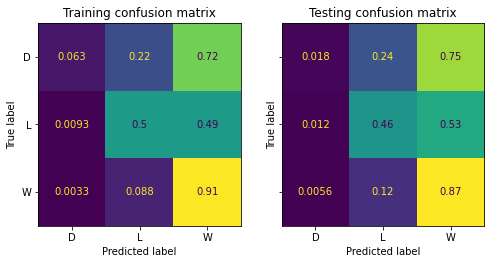

In [88]:
compare_cf_matrix(svc, X_train, X_test, y_train, y_test)
plt.grid(False)

In [89]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           D       0.42      0.02      0.03       791
           L       0.54      0.46      0.49       916
           W       0.54      0.87      0.67      1436

    accuracy                           0.54      3143
   macro avg       0.50      0.45      0.40      3143
weighted avg       0.51      0.54      0.46      3143



In [90]:
round(my_scorer(svc, X_test, y_test), 2)

-682.3

A simple svm performs close to our logistic regression model,  
lets try to improve it further, but first lets look at the  
probabilities the model predicts.

In [91]:
prob = svc.predict_proba(X_test)

In [92]:
svc_pred = pd.DataFrame(
    np.hstack(
        (y_test.values.reshape((-1, 1)), svc.predict(X_test).reshape(-1, 1), prob)
    ),
    columns=["actual", "predicted", "Draw", "Loose", "Win"],
)

In [93]:
svc_pred["draw"] = pd.to_numeric(svc_pred["Draw"])
svc_pred["loose"] = pd.to_numeric(svc_pred["Loose"])
svc_pred["win"] = pd.to_numeric(svc_pred["Win"])

In [94]:
svc_pred.describe().style.format("{:.2f}")

,draw,loose,win
count,3143.00,3143.00,3143.00
mean,0.25,0.29,0.45
std,0.04,0.13,0.14
min,0.16,0.11,0.07
25%,0.23,0.19,0.36
50%,0.25,0.24,0.50
75%,0.28,0.37,0.57
max,0.44,0.68,0.68


Seems like the average probabilities for home wins  
are almost twice as high as for draw and loss. It  
is logical because the model more likely predicts  
home wins than any outcome.

### Trying out more pre-processing

Our simple svm model didn't perform as well as a  
logistic regression model, lets see if we can improve  
it with cross validation and more pre-procesing steps.
  
The dataset is a bit unbalanced, with home wins  
making up 48% of the data, let's see if we could  
fix it with some oversampling or maybe reduce the  
noise with PCA.

#### Can PCA help us with making predictions

Let's inspect if the pca could help with separating  
different outcome of matches.

In [95]:
x_pca = X.copy()

In [96]:
scaled_data = StandardScaler().fit_transform(x_pca)
pca = PCA(n_components=10).fit(scaled_data)
results = pca.transform(scaled_data)

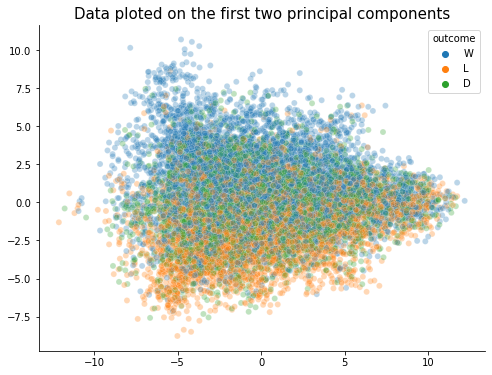

In [97]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.scatterplot(x=results[:, 0], y=results[:, 1], hue=y, alpha=0.3)
ax.set_title("Data ploted on the first two principal components", fontsize=15)
sns.despine()
plt.show()

We see that that our data still stays in the same  
clump although it is possible to see some separation  
between wins and losses, the draws however seem to  
be mixed in allover the place.

In [98]:
pd.DataFrame(pca.explained_variance_).T.style.format("{:.2f}")

,0,1,2,3,4,5,6,7,8,9
0,14.64,6.54,5.38,2.81,1.90,1.41,1.32,1.14,1.10,1.00


The first principal component explains almost 15% of  
the variance in the data, lets see what features make it  
up.

In [99]:
pd.DataFrame(pca.components_[0].reshape(1, -1), columns=x_pca.columns).T.sort_values(
    0, ascending=False, key=abs
).head().style.format("{:.2f}")

,0
home_total_rating,-0.23
home_average_rating,-0.23
away_total_rating,-0.22
away_average_rating,-0.22
overall_rating_home_player_3,-0.19


The most important features that reveal the most   
variance in the data comes from the average and total  
rating of teams.

#### Creating more data with oversampling

To fix the problem of data imbalance lets try  
using smote. This method can synthesize data  
for underrepresented classes in the boundaries  
between the examples of the underrepresented class.  
The downside of this approach is that the data will  
be arbitrary and if the data point are far apart  
it can introduce noise into the data. To combat this  
lets also try using smote with tomek. Tomek is method  
that under-samples data by removing data points that   
are close together in space but are from different  
classes, thus potentially reducing noise created by smote.

In [100]:
X_train_smote = SMOTE().fit_resample(X_train, y_train)
X_train_smote_tomek = SMOTETomek(sampling_strategy="all").fit_resample(X_train, y_train)

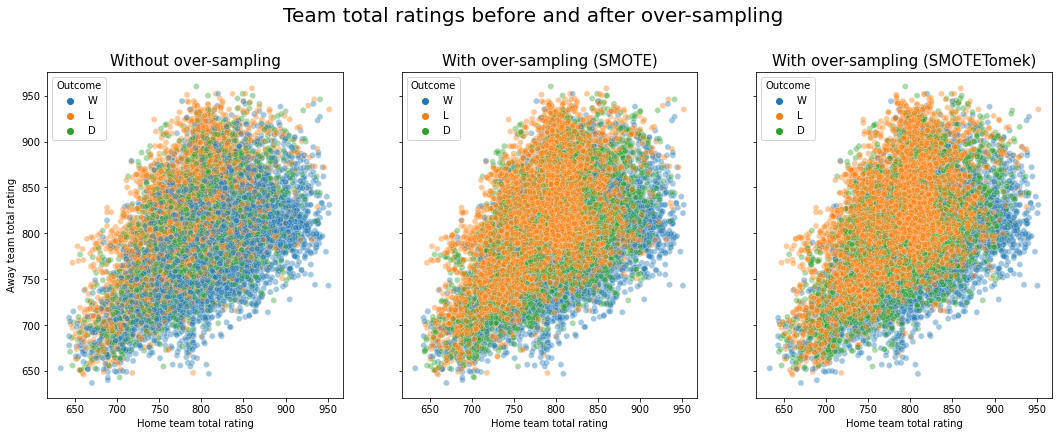

In [101]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)
sns.scatterplot(
    X_train.home_total_rating,
    X_train.away_total_rating,
    hue=y_train,
    alpha=0.4,
    ax=ax[0],
)
ax[0].set_title("Without over-sampling", fontsize=15)
ax[0].set_ylabel("Away team total rating")
ax[0].set_xlabel("Home team total rating")
ax[0].legend(title="Outcome")
sns.scatterplot(
    X_train_smote[0].home_total_rating,
    X_train_smote[0].away_total_rating,
    hue=X_train_smote[1],
    alpha=0.4,
    ax=ax[1],
)
ax[1].set_title("With over-sampling (SMOTE)", fontsize=15)
ax[1].set_xlabel("Home team total rating")
ax[1].legend(title="Outcome")
sns.scatterplot(
    X_train_smote_tomek[0].home_total_rating,
    X_train_smote_tomek[0].away_total_rating,
    hue=X_train_smote_tomek[1],
    alpha=0.4,
    ax=ax[2],
)
ax[2].set_title("With over-sampling (SMOTETomek)", fontsize=15)
ax[2].set_xlabel("Home team total rating")
ax[2].legend(title="Outcome")
plt.suptitle("Team total ratings before and after over-sampling", y=1.03, fontsize=20)
plt.show()

It's hard to tell looking at multidimensional data from  
one side but looks like smote might increase noise in the  
data. 

In [102]:
sample_results_df = pd.concat(
    [
        y_train.value_counts(),
        X_train_smote[1].value_counts(),
        X_train_smote_tomek[1].value_counts(),
    ],
    axis=1,
)
sample_results_df.columns = ["Initial", "SMOTE", "SMOTETomek"]
sample_results_df

,Initial,SMOTE,SMOTETomek
W,5744,5744,5139
L,3660,5744,5338
D,3165,5744,5373


We can see that smote made the number of data points   
equal for all outcomes of a match, while Tomek  
under-sampled both the majority and minority classes after  
synthesis by smote.

#### Checking if our strategies improve the model

In [103]:
svc = ImPipeline(
    [
        ("scale", StandardScaler()),
        ("sample", SMOTE()),
        ("pca", PCA()),
        ("svm", SVC()),
    ]
)
params = [
    {
        "sample": [SMOTE(), SMOTETomek()],
        "pca": ["passthrough"],
        "svm__C": stats.loguniform(1e-3, 1e3),
        "svm__kernel": ["rbf"],
        "svm__class_weight": ["balanced", None],
    },
    {
        "sample": [SMOTE(), SMOTETomek()],
        "pca__n_components": [10, 15, 20],
        "svm__C": stats.loguniform(1e-3, 1e3),
        "svm__kernel": ["rbf"],
        "svm__class_weight": ["balanced", None],
    },
]

Also making the search space for random sampler a bit more varied  
by adding PCA and passthrough options for `RandomizedSearchCV`.

In [104]:
svc_cv_test = RandomizedSearchCV(
    svc,
    param_distributions=params,
    scoring=my_scorer,
    n_iter=30,
    n_jobs=-1,
    random_state=rng,
)

In [105]:
# svc_cv_test.fit(X_train, y_train)

In [106]:
# with open("svc_cv_test.dump", "wb") as f:
#    joblib.dump(svc_cv_test, f)

In [107]:
with open("svc_cv_test.dump", "rb") as f:
    svc_cv_test = joblib.load(f)

In [108]:
pd.DataFrame(svc_cv_test.cv_results_).sort_values("rank_test_score").head().iloc[:, 5:]

,param_sample,param_svm__C,param_svm__class_weight,param_svm__kernel,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
23,SMOTE(),0.05993,balanced,rbf,10,"{'pca__n_components': 10, 'sample': SMOTE(), '...",-930.5,-719.0,39.2,-161.1,-2362.2,-826.72,845.333088,1
14,SMOTETomek(),0.005398,balanced,rbf,20,"{'pca__n_components': 20, 'sample': SMOTETomek...",-1099.4,-92.3,-300.7,-412.1,-2416.4,-864.18,846.451434,2
16,SMOTETomek(),1.319496,None,rbf,15,"{'pca__n_components': 15, 'sample': SMOTETomek...",-320.5,-1131.9,-415.6,-788.0,-1903.8,-911.96,573.355815,3
25,SMOTETomek(),0.057667,balanced,rbf,NaN,"{'pca': 'passthrough', 'sample': SMOTETomek(),...",-988.5,-587.2,-89.0,-639.1,-2321.3,-925.02,754.775409,4
21,SMOTETomek(),30.473382,balanced,rbf,NaN,"{'pca': 'passthrough', 'sample': SMOTETomek(),...",-1470.4,112.8,-1571.5,-966.0,-956.7,-970.36,597.469747,5


The best selected model was the one that used bot SMOTE and PCA  
with 10 principal components, from the scoring we can again see  
that the profit depends on the split of the data, in this case one  
split even made an actual positive profit.

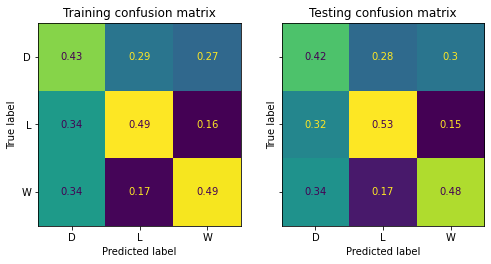

In [109]:
compare_cf_matrix(svc_cv_test, X_train, X_test, y_train, y_test)
plt.grid(False)

In [110]:
print(classification_report(y_test, svc_cv_test.predict(X_test)))

              precision    recall  f1-score   support

           D       0.30      0.42      0.35       791
           L       0.51      0.53      0.52       916
           W       0.65      0.48      0.55      1436

    accuracy                           0.48      3143
   macro avg       0.48      0.48      0.47      3143
weighted avg       0.52      0.48      0.49      3143



In [111]:
print(f"Money made: {round(my_scorer(svc_cv_test, X_test, y_test), 2)}")

Money made: -87.2


Looking at the model metrics we see that we are actually  
predicting not only wins but draws and losses also, though  
we are making more overall mistakes our score is actually the  
best one yet, but again it highly depends on the split the  
model receives

#### Without oversampling

Lets try cross validation but without using over-sampling.  
Maybe it will also result in better score bu without the loss  
in overall precision.

In [112]:
svc = Pipeline(
    [
        ("scale", StandardScaler()),
        ("pca", PCA()),
        ("svm", SVC()),
    ]
)
params = [
    {
        "pca": ["passthrough"],
        "svm__C": stats.loguniform(1e-3, 1e3),
        "svm__kernel": ["rbf"],
    },
    {
        "pca__n_components": stats.randint(10, 40),
        "svm__C": stats.loguniform(1e-3, 1e3),
        "svm__kernel": ["rbf"],
    },
]

In [113]:
svc_cv_no_over = RandomizedSearchCV(
    svc,
    param_distributions=params,
    n_iter=30,
    n_jobs=-1,
    scoring=my_scorer,
    random_state=rng,
)

In [114]:
# svc_cv_no_over.fit(X_train, y_train)

In [115]:
# with open("svc_cv_no_over.dump", "wb") as f:
#    joblib.dump(svc_cv_no_over, f)

In [116]:
with open("svc_cv_no_over.dump", "rb") as f:
    svc_cv_no_over = joblib.load(f)

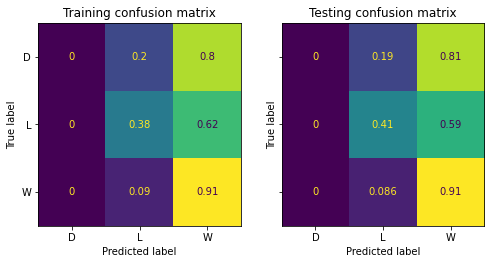

In [117]:
compare_cf_matrix(svc_cv_no_over, X_train, X_test, y_train, y_test)
plt.grid(False)

In [118]:
print(classification_report(y_test, svc_cv_no_over.predict(X_test)))

              precision    recall  f1-score   support

           D       0.00      0.00      0.00       791
           L       0.58      0.41      0.48       916
           W       0.53      0.91      0.67      1436

    accuracy                           0.54      3143
   macro avg       0.37      0.44      0.38      3143
weighted avg       0.41      0.54      0.45      3143



In [119]:
pd.DataFrame(svc_cv_no_over.cv_results_).sort_values("rank_test_score").head().iloc[
    :, 4:
]

,param_pca__n_components,param_svm__C,param_svm__kernel,param_pca,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,13,0.170651,rbf,NaN,"{'pca__n_components': 13, 'svm__C': 0.17065087...",-718.5,-427.2,-494.5,-844.9,-1903.6,-877.74,534.543501,1
13,25,0.217625,rbf,NaN,"{'pca__n_components': 25, 'svm__C': 0.21762486...",-802.8,-399.7,-345.3,-948.6,-1973.5,-893.98,586.859954,2
17,18,0.082391,rbf,NaN,"{'pca__n_components': 18, 'svm__C': 0.08239138...",-932.7,-535.6,-463.4,-965.7,-1613.5,-902.18,409.353438,3
2,13,0.321867,rbf,NaN,"{'pca__n_components': 13, 'svm__C': 0.32186680...",-931.3,-321.8,-512.7,-757.1,-2040.9,-912.76,601.091566,4
20,NaN,0.057447,rbf,passthrough,"{'pca': 'passthrough', 'svm__C': 0.05744663972...",-920.0,-733.1,-417.5,-757.5,-1762.0,-918.02,452.280556,5


In [120]:
print(f"Money made: {round(my_scorer(svc_cv_no_over, X_test, y_test), 2)}")

Money made: -250.7


Interestingly the model now performs better based on  
accuracy even though it simply does not predict draws  
anymore, but the score for money gain is a bit lower  
than the over-sampled model.

### Trying out feature selection

Let's try out one more thing to maybe and  
improve our scores. We have lots of  
features but maybe some are just not  
needed, so lets trim them a bit.

In [121]:
# good_feat = SelectKBest(chi2, k=26).fit(X_train, y_train)
# feat_keep = X_train.columns[good_feat.get_support()]
# X_train_red = X_train[feat_keep]
# X_test_red = X_test[feat_keep]

In [122]:
svc = Pipeline(
    [
        ("feature_selection", SelectKBest(chi2, k=26)),
        ("scale", StandardScaler()),
        ("pca", PCA()),
        ("svm", SVC()),
    ]
)
params = [
    {
        "pca": ["passthrough"],
        "svm__C": stats.loguniform(1e-3, 1e3),
        "svm__kernel": ["rbf"],
    },
    {
        "pca__n_components": stats.randint(10, 20),
        "svm__C": stats.loguniform(1e-3, 1e3),
        "svm__kernel": ["rbf"],
    },
]

In [123]:
svc_feat = RandomizedSearchCV(
    svc,
    param_distributions=params,
    scoring=my_scorer,
    n_iter=40,
    n_jobs=-1,
    random_state=rng,
)

In [124]:
# svc_feat.fit(X_train, y_train)

In [125]:
# with open("svc_feat.dump", "wb") as f:
#    joblib.dump(svc_feat, f)

In [126]:
with open("svc_feat.dump", "rb") as f:
    svc_feat = joblib.load(f)

In [127]:
X_train.columns[svc_feat.best_estimator_["feature_selection"].get_support()]

Index(['B365H', 'B365D', 'B365A', 'overall_rating_home_player_2',
       'overall_rating_home_player_3', 'overall_rating_home_player_4',
       'overall_rating_home_player_5', 'overall_rating_home_player_6',
       'overall_rating_home_player_7', 'overall_rating_home_player_8',
       'overall_rating_home_player_9', 'overall_rating_home_player_10',
       'overall_rating_home_player_11', 'overall_rating_away_player_4',
       'overall_rating_away_player_6', 'overall_rating_away_player_8',
       'overall_rating_away_player_9', 'overall_rating_away_player_10',
       'overall_rating_away_player_11', 'home_team_buildUpPlayPassing',
       'home_team_defencePressure', 'away_team_defencePressure',
       'home_total_rating', 'home_average_rating', 'away_total_rating',
       'away_average_rating'],
      dtype='object')

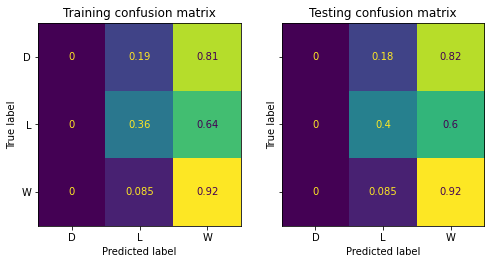

In [128]:
compare_cf_matrix(svc_feat, X_train, X_test, y_train, y_test)
plt.grid(False)

In [129]:
print(classification_report(y_test, svc_feat.predict(X_test)))

              precision    recall  f1-score   support

           D       0.00      0.00      0.00       791
           L       0.58      0.40      0.47       916
           W       0.52      0.92      0.67      1436

    accuracy                           0.53      3143
   macro avg       0.37      0.44      0.38      3143
weighted avg       0.41      0.53      0.44      3143



In [130]:
print(f"Money made: {round(my_scorer(svc_feat, X_test, y_test), 2)}")

Money made: -588.6


Seems like that did not really help, we get acceptable  
accuracy but are loosing more money than with other models.

In [131]:
pd.DataFrame(svc_feat.cv_results_).sort_values("mean_test_score", ascending=False).head(
    5
)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,param_svm__C,param_svm__kernel,param_pca,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
33,12.933394,0.277607,5.100493,0.044407,11,0.039412,rbf,NaN,"{'pca__n_components': 11, 'svm__C': 0.03941191...",-702.0,-434.6,-556.1,-977.5,-1565.5,-847.14,402.242209,1
30,13.933716,0.178315,5.161443,0.061588,17,0.232879,rbf,NaN,"{'pca__n_components': 17, 'svm__C': 0.23287924...",-560.4,-537.2,-179.5,-1128.7,-1841.3,-849.42,581.657966,2
31,13.376271,0.293476,5.236106,0.098263,14,0.046162,rbf,NaN,"{'pca__n_components': 14, 'svm__C': 0.04616226...",-814.2,-419.3,-540.5,-877.4,-1616.6,-853.60,417.357377,3
11,13.524998,0.268477,4.964322,0.052768,16,0.35102,rbf,NaN,"{'pca__n_components': 16, 'svm__C': 0.35102015...",-626.6,-496.7,-157.0,-1137.4,-1853.3,-854.20,590.609668,4
17,17.521701,0.735589,6.311710,0.213956,18,0.17751,rbf,NaN,"{'pca__n_components': 18, 'svm__C': 0.17751026...",-598.7,-586.1,-270.1,-1195.7,-1841.8,-898.48,558.659662,5


### Comparing over-sampled model to no oversampling model

These two models seam to have performed best on our  
test set, lets see if the difference in performance  
is due to chance or if it might be actually significant.

In [132]:
n = 10
over_sampling = np.zeros((n,))
no_over_sampling = np.zeros((n,))

In [133]:
for i in range(n):
    _, xa_test, _, ya_test = train_test_split(
        X_test, y_test, train_size=0.9, random_state=rng
    )
    _, xb_test, _, yb_test = train_test_split(
        X_test, y_test, train_size=0.9, random_state=rng
    )
    over_sampling[i] = my_scorer(svc_cv_test, xa_test, ya_test)
    no_over_sampling[i] = my_scorer(svc_cv_no_over, xb_test, yb_test)

In [134]:
p_value, mean_diff, diffs = permute_p(over_sampling, no_over_sampling, 1000, alt="less")
print(f"Permuted p-value: {p_value:.3f}, difference in profit: {mean_diff:.2f}")

Permuted p-value: 0.020, difference in profit: -123.37


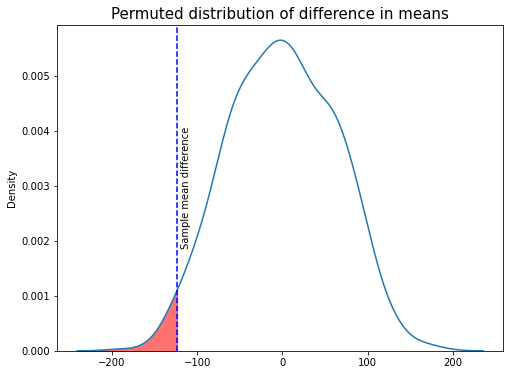

In [135]:
plot_pvalue(diffs, mean_diff, p_value, alt="less")

Seems like there is a significant difference in the  
the profit the models can provide, and the not over-sampled  
model gives better returns overall.

# Predicting goal count

This is an interesting problem as you need to produce two outputs,  
one for the home and one for the away team. 

Another question is what kind of model to use, a regression or a  
classification one. With regression the model won't perfectly  
predict an integer for the goal count, on the other hand a   
classification model looses the ability to predict new goal  
counts that might happen in the future. Although whatever model  
I choose it seems unlikely that it will predict goal counts too  
well from the data we have.

In [136]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import multilabel_confusion_matrix

In [137]:
y = pd.DataFrame(
    {"home_goal": X_goal.home_team_goal, "away_goal": X_goal.away_team_goal}
)
X = X_goal.drop(
    [
        "home_team_goal",
        "away_team_goal",
        "goal_diff",
    ],
    axis=1,
)

In [138]:
y.home_goal.value_counts()

1     5018
2     3835
0     3544
3     2000
4      876
5      292
6      106
7       28
8        8
9        3
10       2
Name: home_goal, dtype: int64

In [139]:
y.away_goal.value_counts()

1    5397
0    5182
2    3173
3    1312
4     454
5     136
6      45
7       7
8       5
9       1
Name: away_goal, dtype: int64

In [140]:
drop_idx = y[(y.home_goal > 6) | (y.away_goal > 6)].index
y = y.drop(index=drop_idx)
X = X.drop(index=drop_idx)

I am dropping all matches where either team made  
more than six goals to be able to stratify the  
data and also remove rare outlier values.

**Again this won't classify unseen cases  
but as most matches contain up to 3 goals  
anyway, maybe it's fine.**

In [141]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, stratify=y.home_goal, random_state=42
)

In [142]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

column_trans = ColumnTransformer(
    [
        ("result", OneHotEncoder(dtype="int", drop="first"), ["outcome"]),
        ("stats", StandardScaler(), X.columns[:-1]),
    ]
)
multi_svm = MultiOutputClassifier(SVC(), n_jobs=-1)

In [143]:
pred_goal = Pipeline([("trans", column_trans), ("svm", multi_svm)])
# pred_goal.fit(X_train, y_train)

In [144]:
# with open("goal.dump", "wb") as f:
#    joblib.dump(pred_goal, f)

In [145]:
with open("goal.dump", "rb") as f:
    pred_goal = joblib.load(f)

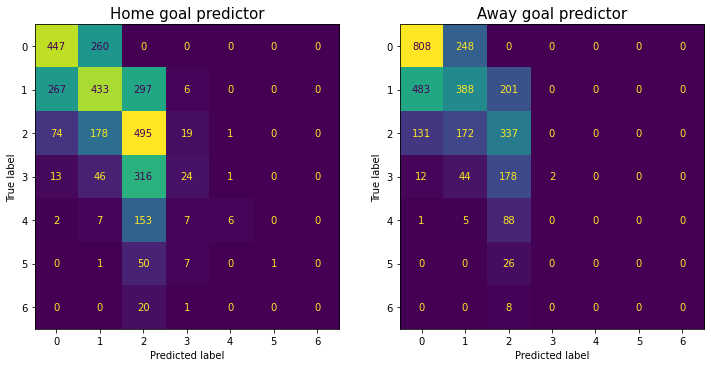

In [146]:
fit, ax = plt.subplots(1, 2, figsize=(12, 8))
fit_trans = pred_goal["trans"]
plot_confusion_matrix(
    pred_goal["svm"].estimators_[0],
    fit_trans.transform(X_test),
    y_test.iloc[:, 0],
    colorbar=False,
    ax=ax[0],
)
ax[0].set_title("Home goal predictor", fontsize=15)
plot_confusion_matrix(
    pred_goal["svm"].estimators_[1],
    fit_trans.transform(X_test),
    y_test.iloc[:, 1],
    colorbar=False,
    ax=ax[1],
)
ax[1].set_title("Away goal predictor", fontsize=15)
plt.grid(False)

In [147]:
print(
    classification_report(
        y_test.iloc[:, 0],
        pred_goal["svm"].estimators_[0].predict(fit_trans.transform(X_test)),
    )
)

              precision    recall  f1-score   support

           0       0.56      0.63      0.59       707
           1       0.47      0.43      0.45      1003
           2       0.37      0.65      0.47       767
           3       0.38      0.06      0.10       400
           4       0.75      0.03      0.07       175
           5       1.00      0.02      0.03        59
           6       0.00      0.00      0.00        21

    accuracy                           0.45      3132
   macro avg       0.50      0.26      0.25      3132
weighted avg       0.48      0.45      0.41      3132



In [148]:
print(
    classification_report(
        y_test.iloc[:, 1],
        pred_goal["svm"].estimators_[1].predict(fit_trans.transform(X_test)),
    )
)

              precision    recall  f1-score   support

           0       0.56      0.77      0.65      1056
           1       0.45      0.36      0.40      1072
           2       0.40      0.53      0.46       640
           3       1.00      0.01      0.02       236
           4       0.00      0.00      0.00        94
           5       0.00      0.00      0.00        26
           6       0.00      0.00      0.00         8

    accuracy                           0.49      3132
   macro avg       0.35      0.24      0.22      3132
weighted avg       0.50      0.49      0.45      3132



As we can see the model predicts mostly the lower end  
of possible goal counts, also home teams seem to have  
quite a few more goals than away team, which is logical  
because home team wins more often then away teams.

In [149]:
y_test.iloc[1:5, :]

,home_goal,away_goal
14309,0,2
11579,1,2
3402,1,1
3579,2,1


In [150]:
pd.DataFrame(pred_goal.predict(X_test.iloc[1:5, :]), columns=["home_goal", "away_goal"])

,home_goal,away_goal
0,0,2
1,0,2
2,1,1
3,3,0


Example of models goal predictions.

The data for who won the match was left  
in, lets if the model cough on on that and  
made right decisions about the outcome of  
the match.

In [151]:
y_true_out = y_test.copy()
y_true_out["outcome"] = "D"
y_true_out["outcome"] = np.where(
    y_true_out.home_goal > y_true_out.away_goal,
    "W",
    y_true_out.outcome,
)
y_true_out["outcome"] = np.where(
    y_true_out.home_goal < y_true_out.away_goal,
    "L",
    y_true_out.outcome,
)
y_pred_out = pd.DataFrame(pred_goal.predict(X_test), columns=["home_goal", "away_goal"])
y_pred_out["outcome"] = "D"
y_pred_out["outcome"] = np.where(
    y_pred_out.home_goal > y_pred_out.away_goal,
    "W",
    y_pred_out.outcome,
)
y_pred_out["outcome"] = np.where(
    y_pred_out.home_goal < y_pred_out.away_goal,
    "L",
    y_pred_out.outcome,
)

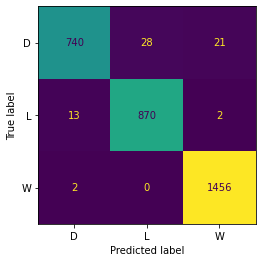

In [152]:
cm = confusion_matrix(y_true_out.outcome, y_pred_out.outcome)
disp = ConfusionMatrixDisplay(cm, display_labels=["D", "L", "W"])
disp.plot(colorbar=False)
plt.show()

Seems like it did learn the outcome data,  
guessing that without it the predictions  
would be a lot worse that it is now.

In [153]:
X_train = X_train.drop("outcome", axis=1)
X_test = X_test.drop("outcome", axis=1)
multi_svm = MultiOutputClassifier(SVC(), n_jobs=-1)

In [154]:
pred_goal2 = Pipeline([("trans", StandardScaler()), ("svm", multi_svm)])
# pred_goal2.fit(X_train, y_train)

In [155]:
# with open("goal2.dump", "wb") as f:
#    joblib.dump(pred_goal2, f)

In [156]:
with open("goal2.dump", "rb") as f:
    pred_goal2 = joblib.load(f)

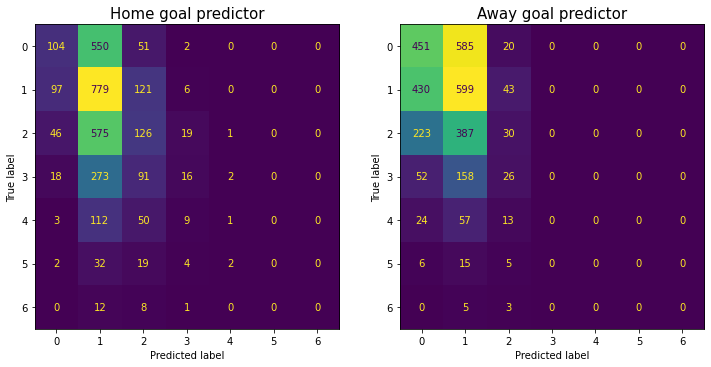

In [157]:
fit, ax = plt.subplots(1, 2, figsize=(12, 8))
plot_confusion_matrix(
    pred_goal2["svm"].estimators_[0],
    pred_goal2["trans"].transform(X_test),
    y_test.iloc[:, 0],
    colorbar=False,
    ax=ax[0],
)
ax[0].set_title("Home goal predictor", fontsize=15)
plot_confusion_matrix(
    pred_goal2["svm"].estimators_[1],
    pred_goal2["trans"].transform(X_test),
    y_test.iloc[:, 1],
    colorbar=False,
    ax=ax[1],
)
ax[1].set_title("Away goal predictor", fontsize=15)
plt.grid(False)

In [158]:
print(
    classification_report(
        y_test.iloc[:, 0],
        pred_goal2["svm"].estimators_[0].predict(pred_goal2["trans"].transform(X_test)),
    )
)

              precision    recall  f1-score   support

           0       0.39      0.15      0.21       707
           1       0.33      0.78      0.47      1003
           2       0.27      0.16      0.20       767
           3       0.28      0.04      0.07       400
           4       0.17      0.01      0.01       175
           5       0.00      0.00      0.00        59
           6       0.00      0.00      0.00        21

    accuracy                           0.33      3132
   macro avg       0.21      0.16      0.14      3132
weighted avg       0.31      0.33      0.26      3132



In [159]:
print(
    classification_report(
        y_test.iloc[:, 1],
        pred_goal2["svm"].estimators_[1].predict(pred_goal2["trans"].transform(X_test)),
    )
)

              precision    recall  f1-score   support

           0       0.38      0.43      0.40      1056
           1       0.33      0.56      0.42      1072
           2       0.21      0.05      0.08       640
           3       0.00      0.00      0.00       236
           4       0.00      0.00      0.00        94
           5       0.00      0.00      0.00        26
           6       0.00      0.00      0.00         8

    accuracy                           0.34      3132
   macro avg       0.13      0.15      0.13      3132
weighted avg       0.29      0.34      0.29      3132



In [160]:
y_pred_out = pd.DataFrame(
    pred_goal2.predict(X_test), columns=["home_goal", "away_goal"]
)
y_pred_out["outcome"] = "D"
y_pred_out["outcome"] = np.where(
    y_pred_out.home_goal > y_pred_out.away_goal,
    "W",
    y_pred_out.outcome,
)
y_pred_out["outcome"] = np.where(
    y_pred_out.home_goal < y_pred_out.away_goal,
    "L",
    y_pred_out.outcome,
)

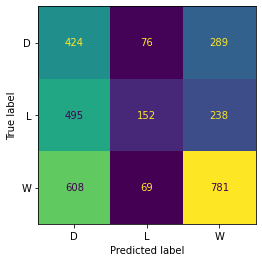

In [161]:
cm = confusion_matrix(y_true_out.outcome, y_pred_out.outcome)
disp = ConfusionMatrixDisplay(cm, display_labels=["D", "L", "W"])
disp.plot(colorbar=False)
plt.show()

As suspected without match outcome  
the model becomes a lot worse.

# Summary

Looking at player ranking and general statistics seems  
like some top players and clubs remain at the top for  
quite some time.  

Higher BMI also tends to indicate a higher overall rating.  

Home advantage is also real and this fact often crept up  
in the predictions my machine learning models were making,  
like match outcome classifier mostly predicting wins no matter  
what.

Accurate match prediction seems pretty difficult, and even  
the betting companies that require those predictions to  
be profitable are right only around 53% of the time. My  
own models also showed similar results, but alas didn't  
really make me any profit. Some ways to improve this  
could be:
* Trying other, non linear models
* Adding more features

For the goal prediction problem it seems like there  
would be a lot of trouble with predicting outliers,  
good thing that outliers are pretty rare with most  
matches ending up with up to 3 goals on either side.  
For improvements:
* Playing around with regression models and rounding   
  the prediction to get an integer, this would theoretically  
  provide predictions to the future, but it is uncertain how  
  necessary that is given the rarity of high goal counts
* Also same as above just trying more different models